In [1]:
import pandas as pd
import numpy as np
import random

# Setting random seed for reproducibility
np.random.seed(42)

# Defining number of rows and columns
n_rows = 500
n_cols = 9

# Creating mixed data types for columns
data = {
    'ID': range(1, n_rows+1),
    'Name': [f"Name_{i}" for i in range(n_rows)],
    'Age': [np.random.choice([np.nan, np.random.randint(20, 80)]) for _ in range(n_rows)],  # Corrected
    'Gender': np.random.choice(['Male', 'Female', 'Other', None], n_rows, p=[0.45, 0.45, 0.05, 0.05]),
    'Email': [f"user{i}@example.com" if random.random() > 0.1 else None for i in range(n_rows)],
    'Phone': [f"{random.randint(1000000000, 9999999999)}" if random.random() > 0.1 else None for _ in range(n_rows)],
    'Salary': [round(random.uniform(30000, 120000), 2) if random.random() > 0.05 else np.nan for _ in range(n_rows)],
    'Join_Date': pd.to_datetime(np.random.choice([None, pd.Timestamp('2020-01-01') + pd.to_timedelta(np.random.randint(0, 365*2), unit='d')], n_rows)),
    'Department': np.random.choice([None, 'HR', 'Finance', 'IT', 'Marketing', 'Admin'], n_rows)
}


# Creating a dataframe
df = pd.DataFrame(data)

# Introducing duplicates intentionally
df = pd.concat([df, df.sample(20, replace=False)], ignore_index=True)

# Introducing columns with inconsistent datatypes for cleaning practice
df['Age'] = df['Age'].astype(str)  # making the 'Age' column as object (string)
df['Phone'] = np.where(df['ID'] % 10 == 0, 'InvalidPhone', df['Phone'])  # Adding invalid phone numbers

# Introducing NaN values intentionally in the dataset for cleaning purposes
df.loc[np.random.choice(df.index, size=20, replace=False), 'Email'] = np.nan
df.loc[np.random.choice(df.index, size=20, replace=False), 'Salary'] = np.nan


Datasets to be merge at the end

In [2]:
# Sample first and last names
first_names = [
    'John', 'Jane', 'Michael', 'Emily', 'Robert', 'Linda', 'William', 'Jessica',
    'David', 'Mary', 'James', 'Patricia', 'Charles', 'Jennifer', 'Joseph', 
    'Sarah', 'Thomas', 'Karen', 'Daniel', 'Nancy', 'Matthew', 'Margaret', 
    'Anthony', 'Lisa', 'Mark', 'Dorothy', 'Donald', 'Helen', 'Steven', 
    'Barbara', 'Paul', 'Elizabeth', 'Andrew', 'Susan', 'Joshua', 'Dorothy',
    'Henry', 'Ashley', 'George', 'Megan', 'Edward', 'Kimberly', 'Ronald', 
    'Michelle', 'Kevin', 'Sandra', 'Brian', 'Ashley', 'Nicholas', 
    'Rebecca', 'Justin', 'Laura', 'Thomas', 'Victoria', 'Jonathan', 
    'Angela', 'Aaron', 'Katherine', 'Jessica', 'Tyler', 'Chloe', 
    'Jordan', 'Samantha', 'Nathan', 'Ava', 'Adam', 'Sophia', 'Daniel',
    'Zoe', 'Ethan', 'Charlotte', 'Matthew', 'Amelia', 'Christopher',
    'Grace', 'Isaac', 'Ella', 'Dylan', 'Lily', 'Caleb', 'Scarlett',
    'Gabriel', 'Aria', 'Lucas', 'Hazel', 'Mason', 'Victoria', 'Henry'
]

last_names = [
    'Smith', 'Johnson', 'Williams', 'Jones', 'Brown', 'Davis', 'Miller', 
    'Wilson', 'Moore', 'Taylor', 'Anderson', 'Thomas', 'Jackson', 
    'White', 'Harris', 'Martin', 'Thompson', 'Garcia', 'Martinez', 
    'Robinson', 'Clark', 'Rodriguez', 'Lewis', 'Lee', 'Walker', 
    'Hall', 'Allen', 'Young', 'Hernandez', 'King', 'Wright', 
    'Lopez', 'Hill', 'Scott', 'Green', 'Adams', 'Baker', 'Gonzalez',
    'Nelson', 'Carter', 'Mitchell', 'Perez', 'Roberts', 'Turner',
    'Phillips', 'Campbell', 'Parker', 'Evans', 'Edwards', 'Collins',
    'Stewart', 'Sanchez', 'Morris', 'Rogers', 'Reed', 'Cook',
    'Morgan', 'Bell', 'Murphy', 'Bailey', 'Rivera', 'Cooper', 
    'Richardson', 'Cox', 'Howard', 'Ward', 'Torres', 'Peterson'
]

# Generating 520 unique names
names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(520)]

# Create DataFrame
beta = pd.DataFrame(names, columns=['Name'])



Task To Achieved:

### Data Cleaning Tasks:
1. **Handle Missing Values:**
   - Identify columns with missing values and fill or drop them appropriately.
   - Fill the 'Age' column's missing values with the mean or median age.
   - Replace missing values in the 'Email' column with a placeholder, such as `"missing@example.com"`.
   
2. **Fix Data Types:**
   - Convert the 'Age' column back to integers (or floats if necessary).
   - Convert the 'Join_Date' column to `datetime` format, handling any invalid values.
   - Standardize phone numbers: Replace any invalid or malformed phone numbers (like `'InvalidPhone'`) with `NaN` or a placeholder.
   
3. **Remove Duplicates:**
   - Identify and remove duplicate rows from the dataset.
   
4. **Standardize Data:**
   - Normalize the 'Gender' column (e.g., standardize cases like "Male" and "male").
   - Ensure 'Department' values are consistent and free from typos (e.g., 'IT', 'it', etc.).
   
5. **Validate Data:**
   - Ensure that the 'Phone' column contains valid 10-digit phone numbers.
   - Ensure salary values are within a reasonable range (e.g., remove outliers below $30,000 or above $120,000).

6. **Concatenation:**
   - Split the 'Name' column into 'First Name' and 'Last Name' (assuming a pattern) and concatenate back if needed.

7. **Handling Outliers:**
   - Identify outliers in 'Salary' and decide whether to remove or cap them.

---

### Query-Based Tasks:
1. **Summarize Age and Salary:**
   - Calculate the average and median age and salary.
   
2. **Department-wise Analysis:**
   - Group data by 'Department' and find the average salary for each department.
   - Find the total number of employees in each department.
   
3. **Gender-based Analysis:**
   - Compare the average salary for 'Male', 'Female', and 'Other' employees.
   - Count the number of employees by gender.

4. **Date-Based Analysis:**
   - Find employees who joined before and after a specific date (e.g., '2021-01-01').
   - Calculate the number of employees who joined in each year.

5. **Top Earners:**
   - List the top 10 highest-paid employees and their respective departments.

6. **Employees with Missing Emails or Phones:**
   - Identify employees who don't have an email or phone number.
   
7. **Find Inconsistent Data:**
   - Query all rows where 'Phone' contains invalid or non-numeric values.
   - Identify records where 'Age' is inconsistent with realistic expectations (e.g., below 18 or above 70).

8. **Detecting Possible Data Entry Errors:**
   - List employees with salaries below $30,000 or above $120,000 to check for data entry errors.
   - Identify employees with nonsensical 'Age' values (e.g., negative numbers, non-numeric values).
   
---

### Tasks:
1. **Merge Data with External Sources:**
   - there’s another dataset with employee Name. Merge it with the existing one and resolve conflicts.
   
2. **Aggregate Results:**
   - Find the average salary by 'Department' and 'Gender' combined.
   - Query the number of people in each age group (e.g., <25, 25-35, 35-45, etc.).

In [3]:
# the study of the datasets which is name and id is not null but other value seems to be inconsistent
df.isnull().sum()

ID              0
Name            0
Age             0
Gender         24
Email          75
Phone          49
Salary         45
Join_Date     266
Department     90
dtype: int64

In [4]:
#Creating some fx

# Fx for giving the good display
def pretty_view(df,option=None):
    """"
    df: dataframe : option Yes/No : Index

    """
    if option=='Yes':
        return pd.DataFrame(df).reset_index()
    if option=='No':
        return pd.DataFrame(df)
    else:
        return 'Please type either Yes/No'
    
# fx for changing the columns name
def change_name(df,new_names):
    """"
    new_names: {'acd':abcd}


    """
    return df.rename(columns=new_names)



### There are none and null value in AGE,SALARY etc. So we are implementing Measure of central Tendency to makeup the value.


In [5]:
# Missing values for age
def n_dtype(df,col):
    return pd.to_numeric(df[col], errors='coerce')

df['Age']= n_dtype(df,'Age')
filling_age_mean=df['Age'].mean()
filling_age_mean_round=round(filling_age_mean,1)
df['Age']=df['Age'].fillna(filling_age_mean_round)
df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Name_0,58.0,Male,user0@example.com,2034180009,92532.90,2021-04-21,None
1,2,Name_1,49.6,Male,user1@example.com,3389984961,98966.15,NaT,None
2,3,Name_2,62.0,Male,user2@example.com,7918550849,99438.96,2021-04-21,IT
3,4,Name_3,49.6,Male,user3@example.com,1374649609,97035.55,2021-04-21,None
4,5,Name_4,49.6,Male,user4@example.com,None,39672.26,NaT,Admin


In [6]:
#Missing values for gender
mode_value=df['Gender'].mode()[0]
df['Gender']=df['Gender'].fillna(mode_value)
df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Name_0,58.0,Male,user0@example.com,2034180009,92532.90,2021-04-21,None
1,2,Name_1,49.6,Male,user1@example.com,3389984961,98966.15,NaT,None
2,3,Name_2,62.0,Male,user2@example.com,7918550849,99438.96,2021-04-21,IT
3,4,Name_3,49.6,Male,user3@example.com,1374649609,97035.55,2021-04-21,None
4,5,Name_4,49.6,Male,user4@example.com,None,39672.26,NaT,Admin


### Assigning 'missing-mail@aham.com' to the null entry

In [29]:
#missing values for email
def fill_email():
    email=df['Email']
    for value in email:
        if value is None:
            df['Email']=df['Email'].fillna('missing-mail@aham.com')
fill_email()
df.tail(20)

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department,Age Group
500,429,Elizabeth Anderson,49,Female,user428@example.com,151-076-4651,50862.5,2021-04-21,Genral,45-65
501,107,Susan Cooper,41,Female,user106@example.com,457-042-6239,73870.4,2021-04-21,Marketing,35-45
502,387,Adam Davis,55,Male,user386@example.com,667-718-7426,118981.7,2021-04-21,Admin,45-65
503,370,Andrew Lewis,49,Other,missing-mail@aham.com,missing,33295.6,2021-04-21,Marketing,45-65
504,421,Jordan Peterson,27,Male,user420@example.com,759-330-7179,82964.6,2021-04-21,Marketing,25-35
505,320,Jessica Morgan,31,Female,user319@example.com,missing,30942.6,2021-04-21,Marketing,25-35
506,198,Grace Perez,49,Male,user197@example.com,276-915-5359,38939.6,2021-04-21,Marketing,45-65
507,404,Amelia Ward,49,Female,user403@example.com,400-401-0214,48952.3,2021-04-21,IT,45-65
508,33,George Torres,33,Female,missing-mail@aham.com,972-922-6073,86489.6,2021-04-21,HR,25-35
509,125,Nancy Gonzalez,49,Female,user124@example.com,270-947-1550,36987.6,2021-04-21,IT,45-65


In [8]:
# FILLING FOR SALARY
filling_salary=n_dtype(df,'Salary')
filling_salary_mean=df['Salary'].mean()
df['Salary']=round(df['Salary'].fillna(filling_age_mean),1)
df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Name_0,58.0,Male,user0@example.com,2034180009,92532.9,2021-04-21,None
1,2,Name_1,49.6,Male,user1@example.com,3389984961,98966.2,NaT,None
2,3,Name_2,62.0,Male,user2@example.com,7918550849,99439.0,2021-04-21,IT
3,4,Name_3,49.6,Male,user3@example.com,1374649609,97035.6,2021-04-21,None
4,5,Name_4,49.6,Male,user4@example.com,None,39672.3,NaT,Admin


In [9]:
# handaling the missing datetime
df['Join_Date']=pd.to_datetime(df['Join_Date'])
median_date=df['Join_Date'].median()
df['Join_Date']=df['Join_Date'].fillna(median_date)
df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Name_0,58.0,Male,user0@example.com,2034180009,92532.9,2021-04-21,None
1,2,Name_1,49.6,Male,user1@example.com,3389984961,98966.2,2021-04-21,None
2,3,Name_2,62.0,Male,user2@example.com,7918550849,99439.0,2021-04-21,IT
3,4,Name_3,49.6,Male,user3@example.com,1374649609,97035.6,2021-04-21,None
4,5,Name_4,49.6,Male,user4@example.com,None,39672.3,2021-04-21,Admin


### Formatted the phone no from 9959728807 to 995-972-8807

In [10]:
#Handaling the missing ph.no
def missing_ph():
    df['Phone']=df['Phone'].apply(lambda x : f"{x[:3]}-{x[3:6]}-{x[6:]}" if pd.notna(x) else 'missing')
   
missing_ph()

df.tail(5)


,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
515,47,Name_46,49.6,Female,user46@example.com,126-251-0035,90956.6,2021-04-21,HR
516,471,Name_470,55.0,Male,user470@example.com,722-596-5583,88524.4,2021-04-21,Admin
517,271,Name_270,49.6,Female,user270@example.com,804-872-0800,32974.4,2021-04-21,None
518,98,Name_97,68.0,Female,user97@example.com,missing,49.6,2021-04-21,Admin
519,224,Name_223,49.6,Male,missing-mail@aham.com,missing,83586.2,2021-04-21,Finance


In [11]:
# Replace 'Inv-ali-dPhone' with 'missing'
df['Phone'] = df['Phone'].replace('Inv-ali-dPhone', 'missing')
df.tail(10)

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
510,426,Name_425,64.0,Male,user425@example.com,497-209-6303,64245.0,2021-04-21,IT
511,470,Name_469,77.0,Male,user469@example.com,missing,49.6,2021-04-21,None
512,93,Name_92,49.6,Male,user92@example.com,251-057-0269,59807.3,2021-04-21,HR
513,432,Name_431,29.0,Female,user431@example.com,139-760-7598,98093.8,2021-04-21,None
514,409,Name_408,66.0,Male,user408@example.com,233-693-7240,35840.2,2021-04-21,Marketing
515,47,Name_46,49.6,Female,user46@example.com,126-251-0035,90956.6,2021-04-21,HR
516,471,Name_470,55.0,Male,user470@example.com,722-596-5583,88524.4,2021-04-21,Admin
517,271,Name_270,49.6,Female,user270@example.com,804-872-0800,32974.4,2021-04-21,None
518,98,Name_97,68.0,Female,user97@example.com,missing,49.6,2021-04-21,Admin
519,224,Name_223,49.6,Male,missing-mail@aham.com,missing,83586.2,2021-04-21,Finance


In [12]:
#handaling the missing department name
def department():
    df['Department']=df['Department'].fillna('Genral')

department()
df.head()



,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Name_0,58.0,Male,user0@example.com,203-418-0009,92532.9,2021-04-21,Genral
1,2,Name_1,49.6,Male,user1@example.com,338-998-4961,98966.2,2021-04-21,Genral
2,3,Name_2,62.0,Male,user2@example.com,791-855-0849,99439.0,2021-04-21,IT
3,4,Name_3,49.6,Male,user3@example.com,137-464-9609,97035.6,2021-04-21,Genral
4,5,Name_4,49.6,Male,user4@example.com,missing,39672.3,2021-04-21,Admin


### Performing the calculation and drawing the box plot for outlier detection

Q1: 45202.0
Q3: 92247.0
IQR: 47044.0
Lower bound: -25363.7
Higher bound: 162812.8
Number of outlier: 0


<Axes: ylabel='Salary'>

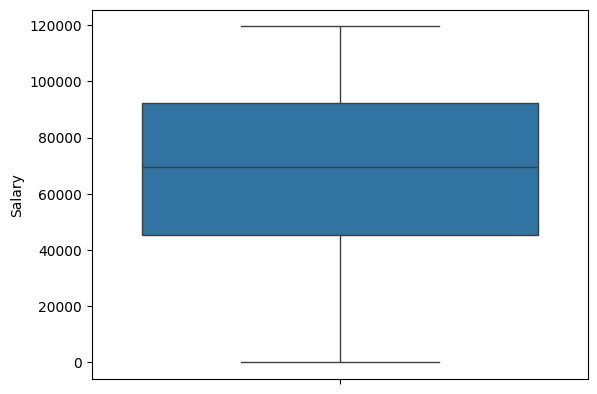

In [13]:
import seaborn as sns
#outlier detetection
datasets=df['Salary']
q1,q3=np.percentile(datasets,[25,75])
#Iqr
iqr=q3-q1
#lower fence/higher fence
lower=q1-1.5*(iqr)
higher=q3+1.5*(iqr)
outlier=[]
count=0
for value in datasets:
    if lower>value or higher<value:
        outlier.append(value)
        count+=1
print('Q1:',round(q1,0))
print('Q3:',round(q3,0))
print('IQR:',round(iqr,0))
print('Lower bound:',round(lower,1))
print('Higher bound:',round(higher,1))
print('Number of outlier:', count)
sns.boxplot(datasets)

### Calculating the mean and median  of age and salary


In [14]:

print('The Average Age in dataset is ',df['Age'].mean().round(2))
print('The Median Salary in dataset is ',df['Salary'].median().round(2))
print('The Average Salary in dataset is ',df['Salary'].mean().round(2))

The Average Age in dataset is  49.6
The Median Salary in dataset is  69577.55
The Average Salary in dataset is  67404.36


### Department and Avg Salary

In [15]:
# Department and their avg Salary

Avg_salary_dep=df.groupby('Department')['Salary'].mean().round(2)
pretty_view(Avg_salary_dep,option='Yes')

,Department,Salary
0,Admin,70865.33
1,Finance,61365.71
2,Genral,67386.39
3,HR,73149.94
4,IT,62339.19
5,Marketing,67824.72


### Employee Count in each Department

In [16]:
# Group by and count
Count_employee = df.groupby('Department')['ID'].count()

# Convert Series to DataFrame
Count_employee = Count_employee.reset_index()

# Rename the column 'ID' to 'Employee Count'
new_names = {'ID': 'Employee Count'}
Count_employee = change_name(Count_employee, new_names)

pretty_view(Count_employee,option='No')


,Department,Employee Count
0,Admin,82
1,Finance,69
2,Genral,90
3,HR,98
4,IT,92
5,Marketing,89


### Avg Montly Salary by Gender

In [17]:
avg_salary_gender=df.groupby('Gender')['Salary'].mean().round(2)
pretty_view(avg_salary_gender,option='Yes')

,Gender,Salary
0,Female,68633.50
1,Male,65925.80
2,Other,65213.51


### Count of the Genders

In [18]:
# Group by and count
Count_employee = df.groupby('Gender')['ID'].count()

# Convert Series to DataFrame
Count_employee = Count_employee.reset_index()

# Rename the column 'ID' to 'Employee Count'
new_names = {'ID': 'Employee Count'}
Count_employee = change_name(Count_employee, new_names)

pretty_view(Count_employee,option='No')


,Gender,Employee Count
0,Female,290
1,Male,207
2,Other,23


### Top Highest Pay Employee


In [19]:
highest_pay = df.sort_values(['Salary'], ascending=False)
highest_pay_candidate=highest_pay[['ID','Email','Age','Department','Salary']]
highest_pay_candidate=highest_pay_candidate.reset_index(drop=True)
highest_pay_candidate.head(10)

,ID,Email,Age,Department,Salary
0,287,user286@example.com,49.6,HR,119543.3
1,284,user283@example.com,49.6,HR,119470.4
2,323,user322@example.com,58.0,HR,119132.1
3,155,user154@example.com,53.0,IT,119035.0
4,387,user386@example.com,55.0,Admin,118981.7
5,387,user386@example.com,55.0,Admin,118981.7
6,258,user257@example.com,54.0,Admin,118458.8
7,158,user157@example.com,49.6,Genral,118313.7
8,321,user320@example.com,45.0,Genral,117509.5
9,32,user31@example.com,44.0,HR,117232.7


### Employee with missing phone and email

In [20]:
def missing(n):
    missing_phone=df[df['Phone']=='missing']
    details= missing_phone[['ID','Phone','Department']]
    return details.head(n)
missing(10)

,ID,Phone,Department
4,5,missing,Admin
9,10,missing,Genral
14,15,missing,HR
19,20,missing,Admin
20,21,missing,Genral
25,26,missing,HR
29,30,missing,HR
33,34,missing,IT
39,40,missing,Admin
49,50,missing,IT


In [21]:
def missing_email(n):
    missing_mail=df[df['Email']=='missing-mail@aham.com']
    details= missing_mail[['ID','Email','Department']]
    return details.head(n)
missing_email(10)

,ID,Email,Department
9,10,missing-mail@aham.com,Genral
15,16,missing-mail@aham.com,Genral
28,29,missing-mail@aham.com,Admin
32,33,missing-mail@aham.com,HR
36,37,missing-mail@aham.com,Marketing
38,39,missing-mail@aham.com,Finance
43,44,missing-mail@aham.com,Genral
54,55,missing-mail@aham.com,IT
56,57,missing-mail@aham.com,HR
58,59,missing-mail@aham.com,HR


In [22]:
df['Age'] = df['Age'].astype(int)
df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Name_0,58,Male,user0@example.com,203-418-0009,92532.9,2021-04-21,Genral
1,2,Name_1,49,Male,user1@example.com,338-998-4961,98966.2,2021-04-21,Genral
2,3,Name_2,62,Male,user2@example.com,791-855-0849,99439.0,2021-04-21,IT
3,4,Name_3,49,Male,user3@example.com,137-464-9609,97035.6,2021-04-21,Genral
4,5,Name_4,49,Male,user4@example.com,missing,39672.3,2021-04-21,Admin


### Below 18 and above 70 will consider for Exit.

In [23]:
filtered_df = df.query('Age<18 or Age>70')
filtered_df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
7,8,Name_7,72,Female,user7@example.com,735-453-9874,74366.0,2021-04-21,IT
10,11,Name_10,72,Female,user10@example.com,547-309-8904,30842.5,2021-04-21,HR
16,17,Name_16,77,Male,user16@example.com,337-979-0678,88101.7,2021-04-21,Genral
25,26,Name_25,74,Female,user25@example.com,missing,95148.4,2021-04-21,HR
58,59,Name_58,72,Male,missing-mail@aham.com,386-086-0138,30539.3,2021-04-21,HR


### List employees with salaries below $30,000 or above $120,000 to check for data entry errors


In [24]:
filtered=df.query('Salary<30000 or Salary>120000')
filtered.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
22,23,Name_22,49,Male,user22@example.com,215-992-9275,49.6,2021-04-21,IT
39,40,Name_39,49,Female,user39@example.com,missing,49.6,2021-04-21,Admin
40,41,Name_40,54,Female,user40@example.com,264-850-1500,49.6,2021-04-21,Genral
54,55,Name_54,49,Female,missing-mail@aham.com,978-830-8927,49.6,2021-04-21,IT
59,60,Name_59,49,Male,user59@example.com,missing,49.6,2021-04-21,Finance


### Add the all employee name which was missing initally

In [25]:
df['Name'] = beta['Name'].values  # Assuming df has the same length as beta

# Now merge them
new_df = pd.merge(df, beta, on='Name', how='inner')

# View the merged DataFrame
df.head()

,ID,Name,Age,Gender,Email,Phone,Salary,Join_Date,Department
0,1,Jessica Campbell,58,Male,user0@example.com,203-418-0009,92532.9,2021-04-21,Genral
1,2,Andrew Wilson,49,Male,user1@example.com,338-998-4961,98966.2,2021-04-21,Genral
2,3,Daniel Harris,62,Male,user2@example.com,791-855-0849,99439.0,2021-04-21,IT
3,4,Daniel Ward,49,Male,user3@example.com,137-464-9609,97035.6,2021-04-21,Genral
4,5,John Cooper,49,Male,user4@example.com,missing,39672.3,2021-04-21,Admin


#### Created the Age_group and their Count

In [26]:
def age_bins():
    # Define age bins and labels
    bins = [0, 25, 35, 45, 65, 80]
    labels = ['<25', '25-35', '35-45', '45-65', '65-80']
    
    # Create a new column 'Age Group' using pd.cut
    df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    
    # Count the number of people in each age group
    age_group_counts = df['Age Group'].value_counts().sort_index()
    
    return age_group_counts

# Call the function and print the results
age_distribution = age_bins()
pretty_view(age_distribution,option='Yes')


,Age Group,count
0,<25,23
1,25-35,41
2,35-45,45
3,45-65,346
4,65-80,65
